In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('reviews.tsv', delimiter='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [12]:
print("Shape:" , df.shape)
print("Columns: ", df.columns)

Shape: (1000, 2)
Columns:  Index(['Review', 'Liked'], dtype='object')


In [13]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
corpus = []
ps = PorterStemmer()

for i in range(df.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    review = review.lower()
    review_words = review.split()
    review_words = [word for word in review_words if word not in set(stopwords.words('english'))]
    review_words = [ps.stem(word) for word in review_words]
    review_cleaned = " ".join(review_words)
    corpus.append(review_cleaned)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

In [31]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [32]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("----- Scores -----\n")
print("Accuracy: ", round(accuracy_score(y_test, y_pred)*100, 2))
print("Precision: ", round(precision_score(y_test, y_pred)*100, 2))
print("Recall: ", round(recall_score(y_test, y_pred)*100, 2))
print("F1 Score: ", round(f1_score(y_test, y_pred)*100, 2))

----- Scores -----

Accuracy:  76.5
Precision:  76.42
Recall:  78.64
F1 Score:  77.51


In [39]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[72, 25],
       [22, 81]])

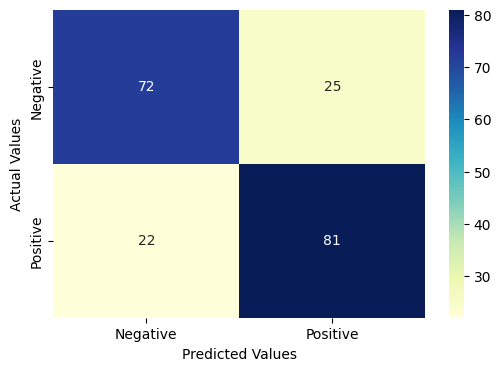

In [44]:
plt.figure(figsize = (6,4))

sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [47]:
best_accuracy = 0.0
alpha = 0.0

for i in np.arange(0.1, 1.1, 0.1):
  classifier = MultinomialNB(alpha=i)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  score = accuracy_score(y_test, y_pred)
  print("Alpha: {}, Score: {}".format(round(i, 1), round(score*100, 2)))
  if score > best_accuracy:
    best_accuracy = score
    alpha = i

print("\n\n----- Best Score -----\n\n")
print("Alpha: ", round(alpha, 1))
print("Score: ", round(best_accuracy*100, 2))

Alpha: 0.1, Score: 78.0
Alpha: 0.2, Score: 78.5
Alpha: 0.3, Score: 78.0
Alpha: 0.4, Score: 78.5
Alpha: 0.5, Score: 77.5
Alpha: 0.6, Score: 77.5
Alpha: 0.7, Score: 77.5
Alpha: 0.8, Score: 77.0
Alpha: 0.9, Score: 76.5
Alpha: 1.0, Score: 76.5


----- Best Score -----


Alpha:  0.2
Score:  78.5


In [48]:
model = MultinomialNB(alpha=0.2)
model.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

In [51]:
def predict_sentiment(review):
  review = re.sub('[^a-zA-Z]', ' ', review)
  review = review.lower()
  review_words = review.split()
  review_words = [word for word in review_words if word not in set(stopwords.words('english'))]
  review_words = [ps.stem(word) for word in review_words]
  review_cleaned = " ".join(review_words)

  temp = cv.transform([review_cleaned]).toarray()
  return model.predict(temp)

In [59]:
sample_review = " this restaurant is best more than ever"

if  predict_sentiment(sample_review):
  print("Positive Review")
else:
  print("Negative Review")

Positive Review
